## TRANSPORTS

plots transports through JDF in mol/m2/s, daily, figures in ./FLUX_plot

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
def make_nclen_hindcast(start,end,ftype, sdir):
    date_ar = []
    sens_ar = []
    doy_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        nc_sens = f"/results/SalishSea/hindcast.201812/{ddmmmyy}/*1d*{ymd}*{ftype}.nc"
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        date_ar.append(ddmmmyy)
        doy_ar.append(dddd)
    return date_ar, sens_ar, doy_ar

In [5]:
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

sdir_hc = '/results/SalishSea/hindcast.201812/*15/'

dates_hc, files_hc_dian_v, doy_hc = make_nclen_hindcast(start,end,'grid_V', sdir_hc)
dates_hc, files_hc_dian_u, doy_hc = make_nclen_hindcast(start,end,'grid_U', sdir_hc)



1
365


In [6]:
t_testU_BR = nc.Dataset(files_hc_dian_u[0])
UVEL = t_testU_BR['vozocrtx']
UVEL_jdfmouth_BR = UVEL[:,:,:,20]
UVEL_jdfmouth2d_BR = np.squeeze(UVEL_jdfmouth_BR)

depth_bounds = t_testU_BR['depthu_bounds']
depth_cell = np.zeros(40)
depth_cell[:] = depth_bounds[:,1]-depth_bounds[:,0]
area_cells_JDF = np.zeros_like(UVEL_jdfmouth2d_BR)
area_cell = depth_cell*440
for i in range(0,898):
    area_cells_JDF[:,i] = area_cell
zlevels = t_testU_BR.variables['depthu']


t_testV_BR = nc.Dataset(files_hc_dian_v[0])
VVEL = t_testV_BR['vomecrty']
VVEL_jstrait_BR = VVEL[:,:,878,50:100]
VVEL_jstrait2d_BR = np.squeeze(VVEL_jstrait_BR)

depth_bounds = t_testV_BR['depthv_bounds']
depth_cell = np.zeros(40)
depth_cell[:] = depth_bounds[:,1]-depth_bounds[:,0]
area_cells_JS = np.zeros_like(VVEL_jstrait2d_BR)
area_cell = depth_cell*440
for i in range(0,50):
    area_cells_JS[:,i] = area_cell
zlevels = t_testV_BR.variables['depthv']






In [7]:
w = area_cells_JS * VVEL_jstrait2d_BR
print(w[20,20])
print(area_cells_JS[20,20])
print(VVEL_jstrait2d_BR[20,20])

-92.3398
1462.71
-0.0631291


In [8]:
# VOL_transports_JDF = np.zeros(365)
# VOL_transports_JS = np.zeros(365)
# for i in range(0,365):
#     if i%20==0:
#         print(i)

#     t_testV_BR = nc.Dataset(files_hc_dian_v[i])
#     VVEL = t_testV_BR['vomecrty']
#     VVEL_jstrait_BR = VVEL[:,:,878,50:100]
#     VVEL_jstrait2d_BR = np.squeeze(np.squeeze(VVEL_jstrait_BR))
#     #m3/day
#     VOL_transports_JS[i] = np.sum(np.sum(area_cells_JS * VVEL_jstrait2d_BR))*60*60*24
    

#     t_testU_BR = nc.Dataset(files_hc_dian_u[i])
#     UVEL = t_testU_BR['vozocrtx']
#     UVEL_jdfmouth_BR = UVEL[:,:,:,20]
#     UVEL_jdfmouth2d_BR = np.squeeze(UVEL_jdfmouth_BR)
#     #m3/day
#     VOL_transports_JDF[i] = np.sum(np.sum(area_cells_JDF * UVEL_jdfmouth2d_BR))*60*60*24



In [9]:
# plt.plot(avg_rhos)
# plt.title('Transport-Weighted Average rho of all gridcells with positive trasport in JS, hindcast 201812')

In [10]:
# f = nc.Dataset('Hindcast_201812_transports_JdF_JS_2015.nc','w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('model_output')
# #g.createDimension('days', len(NO3_mod))
# g.createDimension('days', 365)
# ts = g.createVariable('VOL_transports_JS','f4',('days'))
# ts[:] = VOL_transports_JS
# ts2 = g.createVariable('VOL_transports_JDF','f4',('days'))
# ts2[:] = VOL_transports_JDF
# f.close()

In [11]:
trans_2015 = nc.Dataset('Hindcast_201812_transports_JdF_JS_2015.nc')
trans_2016 = nc.Dataset('Hindcast_201812_transports_JdF_JS_2016.nc')

In [12]:
vol_JS = trans_2015['model_output']['VOL_transports_JS']
vol_JDF = trans_2015['model_output']['VOL_transports_JDF']
vol_JS_2016 = trans_2016['model_output']['VOL_transports_JS']
vol_JDF_2016 = trans_2016['model_output']['VOL_transports_JDF']

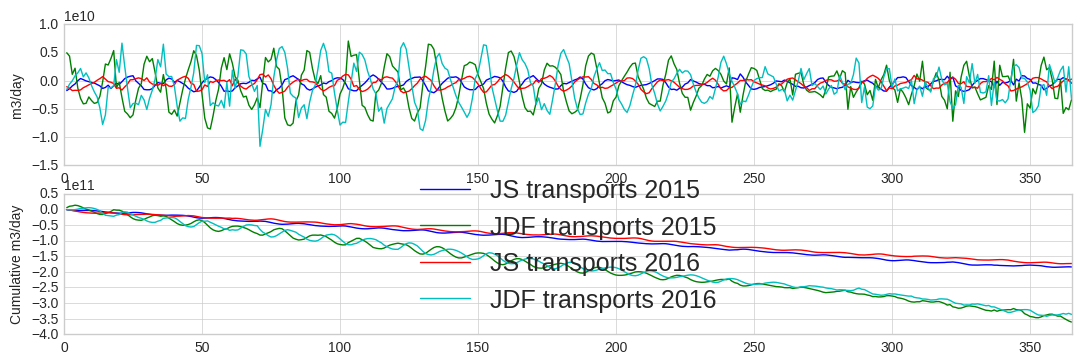

In [13]:
days_2015 = np.arange(1,366,1)
days_2016 = np.arange(1,367,1)
fig = plt.figure(figsize=(13,4))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    if i ==1:
        ax.plot(days_2015,vol_JS, label = 'JS transports 2015')
        ax.plot(days_2015,vol_JDF, label = 'JDF transports 2015')
        ax.plot(days_2016,vol_JS_2016, label = 'JS transports 2016')
        ax.plot(days_2016,vol_JDF_2016, label = 'JDF transports 2016')
        ax.set_xlim([0,365])
        ax.set_ylabel('m3/day')
    if i == 2:

        ax.plot(days_2015,np.cumsum(vol_JS), label = 'JS transports 2015')
        ax.plot(days_2015,np.cumsum(vol_JDF), label = 'JDF transports 2015')
        ax.plot(days_2016,np.cumsum(vol_JS_2016), label = 'JS transports 2016')
        ax.plot(days_2016,np.cumsum(vol_JDF_2016), label = 'JDF transports 2016')
        ax.legend(loc = 'best', fontsize = 18)
        ax.set_xlim([0,365])
        ax.set_ylabel('Cumulative m3/day')